In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("StressLevelDataset.csv")
#data.head()
#data.isnull().sum()
#sns.heatmap(data.isnull())

#data.head()
#data["stress_level"].value_counts().plot(kind="bar")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [2]:
y = data["mental_health_history"]
x = data.drop(["mental_health_history"], axis=1)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.48020782,  0.24861241, -0.20139257, ...,  0.16424895,
        -0.40337716,  0.00442758],
       [ 0.64374608, -1.09358954,  0.31650766, ...,  1.57576339,
         1.5570715 ,  1.22201077],
       [ 0.15313129,  0.02491208,  0.18703261, ..., -0.54150826,
        -0.40337716,  0.00442758],
       ...,
       [-1.15517484,  0.91971338, -1.23719303, ..., -0.54150826,
        -1.05686005, -1.21315562],
       [ 1.62497568, -1.98839084,  0.8344079 , ...,  0.87000617,
         0.90358861,  1.22201077],
       [ 1.13436088, -1.31728986,  0.31650766, ..., -1.24726548,
         0.90358861,  1.22201077]], shape=(1100, 20))

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=22)

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [6]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [7]:
y_test

1028    1
293     0
962     0
591     1
455     0
       ..
711     1
7       1
801     0
386     1
829     0
Name: mental_health_history, Length: 330, dtype: int64

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7575757575757576


In [10]:
from sklearn.pipeline import Pipeline

In [11]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, solver="liblinear"))
])

In [12]:
param_grid = {
    "lr__C": [0.01, 0.1, 1, 10, 100],
    "lr__penalty": ["l1", "l2"]
}

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [15]:
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)

Best params: {'lr__C': 0.1, 'lr__penalty': 'l1'}


In [16]:
from sklearn.metrics import classification_report
y_pred = grid.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Test accuracy: 0.7545454545454545
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       173
           1       0.73      0.77      0.75       157

    accuracy                           0.75       330
   macro avg       0.75      0.76      0.75       330
weighted avg       0.76      0.75      0.75       330



In [17]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix (y_test, y_pred)
conf_mat

array([[128,  45],
       [ 36, 121]])

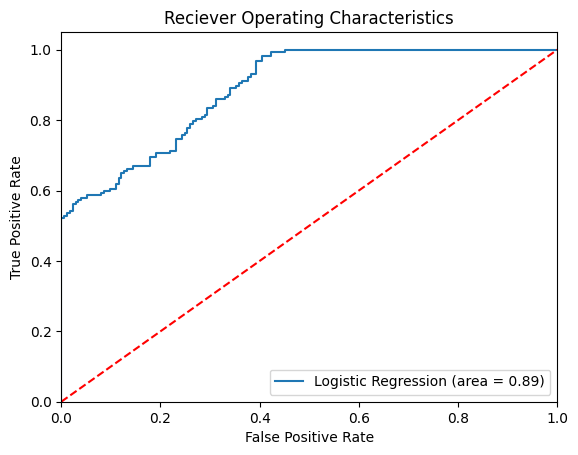

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_score = lr.predict_proba(x_test)[:,1]

logit_roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()